In [42]:
#spam classifier
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv('spam.csv',encoding="ISO-8859-1").fillna('')
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.rename(columns={'v1':'label','v2':'message'},inplace=True)
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [44]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<AxesSubplot:>

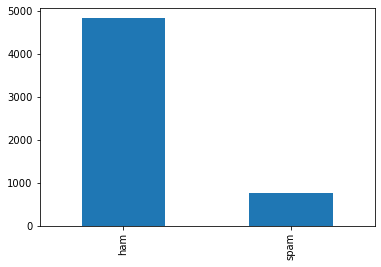

In [45]:
df.label.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='label'>

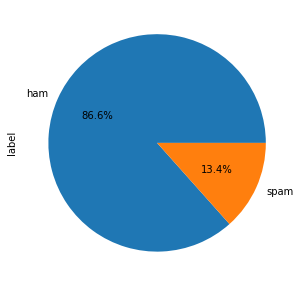

In [46]:
df['label'].value_counts().plot(kind='pie',figsize=(8,5),autopct='%1.1f%%')

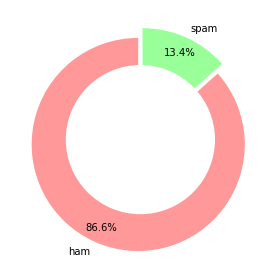

In [47]:
labels = 'ham', 'spam'

#colors
colors = ['#ff9999','#99ff99']
#explsion
explode = (0.05,0.05)
 
plt.pie(list(df.label.value_counts()), colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

# Word Cloud for spam messages 

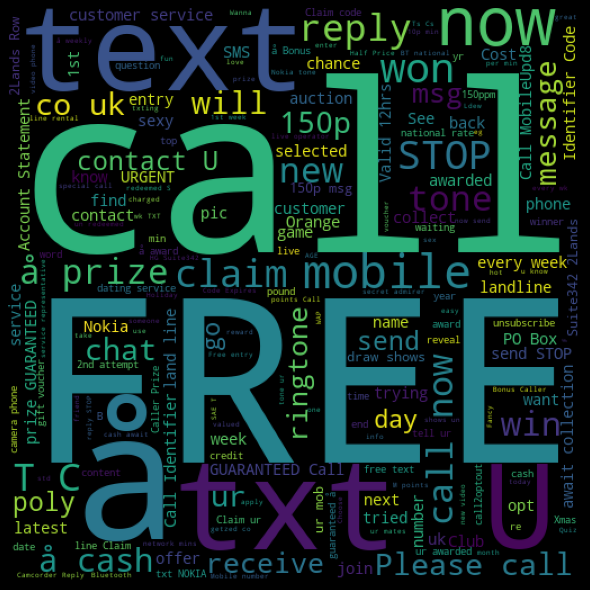

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
spamwords=''.join(list(df[df['label']=='spam']['message']))
spam_wc=WordCloud(width=512,height=512).generate(spamwords)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# WordCloud for Non spam messages 

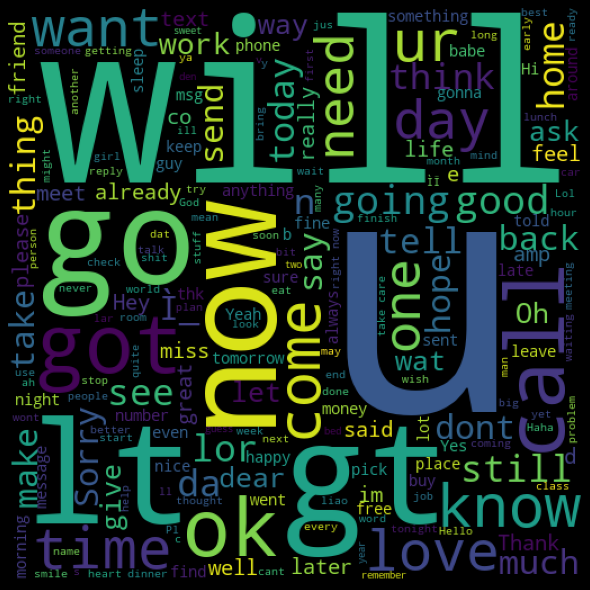

In [51]:
import matplotlib.pyplot as plt

spamwords=''.join(list(df[df['label']=='ham']['message']))
spam_wc=WordCloud(width=512,height=512).generate(spamwords)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [8]:
import nltk
nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [9]:
ps = PorterStemmer()    # 

def clean_data(review):

    review = review.lower()
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

corpus = []
for i in df.message:
    corpus.append(clean_data(i))  

    
#corpus = [clean_data(i) for i in df.message]

In [36]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
cv = cv.fit(corpus)    # use this 
X = cv.transform(corpus).toarray() # then this 
y=pd.get_dummies(df['label'])
y=y.iloc[:,1].values

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
y


array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

#  Training model using Naive bayes classifier

In [37]:

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)


In [38]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [39]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[943,   6],
       [  9, 157]], dtype=int64)

In [40]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9865470852017937

In [41]:
precision = precision_score(y_test, y_pred)
precision

0.9631901840490797

In [16]:
mail="""Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now!
        C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! !"""
new = [clean_data(mail)]
c = cv.transform(new).toarray()
res = spam_detect_model.predict(c)
a=res[0]
if(a==1):
    print("its a spam ")
else:
    print("NOt spam ")

its a spam 


# Training model using DecisionTree classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
spam_detect_model = DecisionTreeClassifier().fit(X_train,y_train)

y_pred=spam_detect_model.predict(X_test)


In [18]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [19]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[942,   7],
       [ 21, 145]], dtype=int64)

In [20]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9748878923766816

In [21]:
precision = precision_score(y_test, y_pred)
precision

0.9539473684210527

In [22]:
mail='what are u doing '
new = [clean_data(mail)]
c = cv.transform(new).toarray()
res = spam_detect_model.predict(c)
res[0]



#spam_detect_model.predict(cv.transform([clean_data(mail)]).toarray())  


0

In [23]:
#'spam' if spam_detect_model.predict(cv.transform([clean_data(mail)]).toarray())[0] else 'Ham'